In [1]:
import pandapower as pp
import pandapower.networks as pn
from pandapower.plotting import simple_plot

import pandas as pd
import numpy as np
import cvxpy as cp
import networkx as nx
import custom_networks
from solution_files_manager import SolutionFilesManager

In [2]:
import os
folder = os.path.abspath(os.getcwd())

## Create network

In [3]:
case = "ccase3_radial"
case_type = 0
net = custom_networks.ccase3_radial(case_type)

In [4]:
# net = pn.case6ww()
# # net.sn_mva = 100

In [5]:
# net = pn.case9()
# net.sn_mva = 100

In [7]:
# # obtain a NetworkX Graph from the network, with each edge containing p.u. impedance data
# graph = pp.topology.create_nxgraph(net, multi=False, calc_branch_impedances=True, branch_impedance_unit="pu")
# graph.edges(data=True)

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


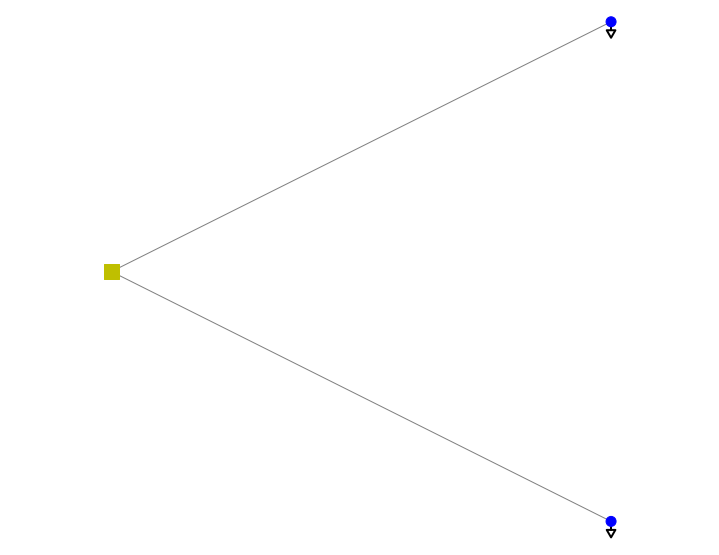

<AxesSubplot:>

In [8]:
simple_plot(net, plot_loads=True, plot_sgens=True)

## Solve

In [9]:
pp.runopp(net, verbose=False, suppress_warnings=False)

/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:167: ComplexWarning: Casting complex values to real discards the imaginary part
  Sf = V[ branch[:, F_BUS].astype(int) ] * conj(Yf * V)  ## cplx pwr at "from" bus, p["u"].
/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/pypower/pipsopf_solver.py:168: ComplexWarning: Casting complex values to real discards the imaginary part
  St = V[ branch[:, T_BUS].astype(int) ] * conj(Yt * V)  ## cplx pwr at "to" bus, p["u"].
/home/ivanightingale/anaconda3/envs/power/lib/python3.9/site-packages/pandapower/results_branch.py:141: RuntimeWarning: divide by zero encountered in true_divide
  res_line_df["loading_percent"].values[:] = i_ka / i_max * 100


In [10]:
net.res_cost

0.020204124412845297

### Save solution

In [ ]:
sfm = SolutionFilesManager(folder, case, case_type, "orig")

In [28]:
V_polar = net.res_bus[["vm_pu", "va_degree"]].to_numpy()
V = V_polar[:,[0]] * np.exp(1j * (V_polar[:,[1]] / 180 * np.pi))
V

array([[1.        +0.j  ],
       [0.98979588-0.01j],
       [0.98979588-0.01j]])

In [29]:
p_g = np.concatenate((net.res_gen[["p_mw"]].to_numpy(), net.res_sgen[["p_mw"]].to_numpy(), net.res_ext_grid[["p_mw"]].to_numpy())) \
    / net.sn_mva
q_g = np.concatenate((net.res_gen[["q_mvar"]].to_numpy(), net.res_sgen[["q_mvar"]].to_numpy(), net.res_ext_grid[["q_mvar"]].to_numpy())) \
    / net.sn_mva

In [30]:
sfm.save_solution(net.res_cost, V, p_g, q_g)